In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [7]:
train= pd.read_csv('winequality-red.csv')
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
train.quality.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [36]:
numeric_features = train.select_dtypes(include=[np.number])

corr = numeric_features.corr()

print (corr['quality'].sort_values(ascending=False)[1:4])

alcohol        0.476166
sulphates      0.251397
citric acid    0.226373
Name: quality, dtype: float64


In [14]:
##Null values
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

                      Null Count
Feature                         
quality                        0
alcohol                        0
sulphates                      0
pH                             0
density                        0
total sulfur dioxide           0
free sulfur dioxide            0
chlorides                      0
residual sugar                 0
citric acid                    0
volatile acidity               0
fixed acidity                  0


In [16]:
data = train.select_dtypes(include=[np.number]).dropna()
print(sum(data.isnull().sum() != 0))

0


In [44]:
y = np.log(train.quality)
X = train[['alcohol','sulphates','citric acid']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [45]:
predictions = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.015941091131814158


In [46]:
print ("R^2 is: \n", model.score(X_test, y_test))
Actualprice=y_test

R^2 is: 
 0.24216432436096358


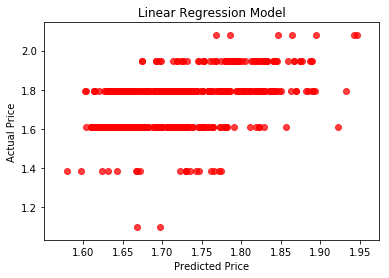

In [47]:
plt.scatter(predictions, Actualprice, alpha=.75,
            color='r') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()